<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
# параметры подключения к базе данных убраны из публичного доступа

DBNAME = ''
USER = ''
PASSWORD = ''
HOST = ''
PORT = ''

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

In [4]:
import warnings
warnings.filterwarnings("ignore")


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [5]:
# текст запроса
query_3_1 = f'''
select 
    count(*)
from 
    public.vacancies
'''

In [6]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

,count
0,49197


In [7]:
print(f'Количество вакансий: {df.squeeze()}')

Количество вакансий: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [8]:
# текст запроса
query_3_2 = f'''
select 
    count(*)
from 
    public.employers
'''

In [9]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [10]:
# текст запроса
query_3_3 = f'''
select 
    count(*)
from 
    public.areas
'''

In [11]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [12]:
# текст запроса
query_3_4 = f'''
select 
    count(*)
from
    public.industries
'''

In [13]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

,count
0,294


***

Выводы по предварительному анализу данных

Предварительный анализ данных показал, что в исследуемой базе данных есть 49197 вакансий (таблица vacancies), 23501 работодатель (таблица employers), 1362 региона (таблица areas) и 294 сферы деятельности (таблица industries).

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [14]:
# текст запроса
query_4_1 = f'''
select 
    count(v.area_id) cnt, a.name area
from 
    public.vacancies v
join public.areas a on a.id = v.area_id
group by a.name
order by 1 desc
limit 5
'''

In [15]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [16]:
# текст запроса
query_4_2 = f'''
select 
    count(*)
from 
    public.vacancies v
where (v.salary_from is not null) or (v.salary_to is not null)
'''

In [17]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [18]:
# текст запроса
query_4_3 = f'''
select 
    round(avg(v.salary_from)), round(avg(v.salary_to))
from 
    public.vacancies v
'''


In [19]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

,round,round
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [20]:
# текст запроса
query_4_4 = f'''
select 
    v.schedule, v.employment, count(*)
from 
    public.vacancies v
group by v.schedule, v.employment
order by 3 desc
limit 5
'''



In [21]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [22]:
# текст запроса
query_4_5 = f'''
select 
    v.experience, count(*)
from 
    public.vacancies v
group by v.experience
order by 2
'''

In [23]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

Выводы по детальному анализу вакансий

Детальный анализ вакансий показал, что: 
1. В исследуемой базе данных представлены вакансии не только на территории РФ, но и в странах СНГ
2. Только у половины вакансий заполнено хотя бы одно из двух полей с зарплатой
3. Среднее значение зарплатной вилки лежит в пределах от 70 до 100 тыс.руб.
4. Большинство представленных вакансий имеют полный рабочий день с полной занятостью
5. Большинство вакансий требуют опыт работы от 1 года до 3 лет, меньше всего вакансий для опытных специалистов

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
# текст запроса
query_5_1 = f'''
select 
    e.name, count(*)
from
    public.vacancies v
join employers e on e.id = v.employer_id
group by e.name
order by 2 desc
limit 5
'''

In [25]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


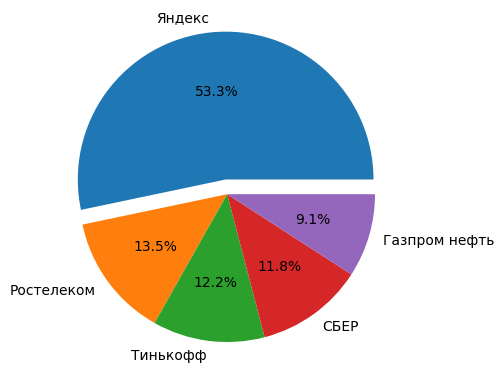

In [26]:
# чуть-чуть визуализации
import matplotlib.pyplot as plt

plt.pie(
    df['count'], 
    labels=df['name'], 
    explode=(0.1, 0, 0.0, 0, 0),
    autopct='%1.1f%%'
    );

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [27]:
# текст запроса
query_5_2 = f'''
select 
    a.name "Название региона",
    count(distinct e.id) "Количество работодателей",
    count(distinct v.id) "Количество вакансий"
from   
    public.areas a
left join public.employers e on e.area = a.id
left join public.vacancies v on v.area_id = a.id
where v.id is NULL
group by a.name
order by 2 desc
limit 5
'''

In [28]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

,Название региона,Количество работодателей,Количество вакансий
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [29]:
# текст запроса
query_5_3 = f'''
select
    count(distinct v.area_id), e.name
from 
    vacancies v
left join employers e on v.employer_id = e.id
group by e.id
order by 1 desc
limit 5
'''

In [30]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

,count,name
0,181,Яндекс
1,152,Ростелеком
2,116,Спецремонт
3,88,Поляков Денис Иванович
4,71,ООО ЕФИН


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [31]:
# текст запроса
query_5_4 = f'''
select 
    count(*) cnt
from 
    employers e left join employers_industries ei on e.id = ei.employer_id
where ei.industry_id is null
'''

In [32]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [33]:
# текст запроса
query_5_5 = f'''
select
    name
from 
    employers e 
left join employers_industries ei on e.id = ei.employer_id
group by e.id
having count(ei.industry_id) = 4
order by name
limit 3
'''

In [34]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

,name
0,101 Интернет
1,21vek.by
2,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [35]:
# текст запроса
query_5_6 = f'''
select
    count(e.id)
from 
    employers e 
left join employers_industries ei on e.id = ei.employer_id
left join industries i on ei.industry_id = i.id
where i.name = 'Разработка программного обеспечения'
'''

In [36]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [37]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup

url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
page = BeautifulSoup(response.text,'html.parser')

cities_here = str(page.find('table', class_="standard"))
cities_here = cities_here.split('title="')[3:]

cities = []
for i in cities_here:
    cities.append(i.split('">')[0])
cities = tuple(cities)



In [38]:
# текст запроса
query_5_7 = f'''
with qr as(
select
    a.name, count(*) cnt
from
    employers e
join vacancies v on v.employer_id = e.id
join areas a on a.id = v.area_id
where e.name = 'Яндекс' and a.name in {cities}
group by a.name
order by 2
)

select 
    qr.name, qr.cnt
from
    qr
UNION ALL
select 'Total', sum(qr.cnt)
from qr
'''

In [39]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

,name,cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

Выводы по анализу работодателей.

Анализ работодателей показал, что: 
1. Компания Яндекс значительно превышает остальные компании по количеству вакансий, вероятно, это связано с развитой экосистемой Яндекса
2. Самым большим географическим охватом также обладает компания Яндекс по той же причине
3. Более 3500 работодателей занимаются специализируются на разработке ПО

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [42]:
# текст запроса

query_6_1 = f'''
select
    count(*)
from
    vacancies v
where lower(v.name) like '%%data%%' or lower(v.name) like '%%данн%%'

'''

In [43]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [44]:
# текст запроса
query_6_2 = f'''
select distinct
    count(*)
from
    vacancies v
where 
(lower(v.name) like '%data scientist%' 
or lower(v.name) like '%data science%'
or lower(v.name) like '%исследователь данных%' 
or (v.name ilike '%ML%' and lower(v.name) not like '%html%')
or lower(v.name) like '%machine learning%' 
or lower(v.name) like '%машинн%обучен%')
and 
(lower(v.name) like '%junior%' 
or lower(v.experience) like '%нет опыта%'
or lower(v.employment) like '%стажировка%')

'''

In [45]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [46]:
# текст запроса
query_6_3 = f'''
select distinct
    count(*)
from
    vacancies v
where 
(lower(v.name) like '%data scientist%' 
or lower(v.name) like '%data science%'
or lower(v.name) like '%исследователь данных%' 
or (v.name ilike '%ML%' and lower(v.name) not like '%html%')
or lower(v.name) like '%machine learning%' 
or lower(v.name) like '%машинн%обучен%')
and 
(v.key_skills ilike '%SQL%' or v.key_skills ilike '%postgres%')
'''

In [47]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [48]:
# текст запроса
query_6_4 = f'''
select distinct
    count(*)
from
    vacancies v
where 
(lower(v.name) like '%data scientist%' 
or lower(v.name) like '%data science%'
or lower(v.name) like '%исследователь данных%' 
or (v.name ilike '%ML%' and lower(v.name) not like '%html%')
or lower(v.name) like '%machine learning%' 
or lower(v.name) like '%машинн%обучен%')
and 
(v.key_skills ilike '%python%')
'''

In [49]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [50]:
# текст запроса
query_6_5 = f'''
select distinct
    round(avg(length(v.key_skills) - length(replace(v.key_skills, CHR(9), '')) + 1), 2)
from
    vacancies v
where 
(v.name ilike '%data scientist%' 
or v.name ilike '%data science%'
or v.name ilike '%исследователь данных%' 
or (v.name like '%ML%' and lower(v.name) not like '%html%')
or v.name ilike '%machine learning%' 
or v.name ilike '%машинн%обучен%')
and v.key_skills is not null
'''

In [51]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [52]:
# текст запроса
query_6_6 = f'''
select distinct
    v.experience, round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to)))
from
    vacancies v
where 
(v.name ilike '%data scientist%' 
or v.name ilike '%data science%'
or v.name ilike '%исследователь данных%' 
or (v.name like '%ML%' and lower(v.name) not like '%html%')
or v.name ilike '%machine learning%' 
or v.name ilike '%машинн%обучен%')
and (v.salary_from is not null or v.salary_to is not null)
group by v.experience
'''

In [53]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

Выводы по предметному анализу.

Предметный анализ показал, что: 
1. В исследуемой базе 1771 вакансия, связанная с данными, из них 51 вакансия, подходящая для начинающего Data Scientist
2. 229 вакансий для DS требуют знания SQL или postgres, 357 вакансий требуют знание языка программирования Python
3. В среднем стек DS состоит из 6-7 навыков
4. Средняя зарплата DS растет с опытом, что вполне логично, специалист с опытом от 3 до 6 лет в среднем получает 243 тыс. руб.

# Общий вывод по проекту

Подведем итог исследования, обобщите выводы

Здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

In [54]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

In [55]:
# текст запроса
# Посмотрим, прямая ли зависимость количества требуемых навыков от заработной платы.
query_7_1 = f'''
select distinct
    round(avg(length(v.key_skills) - length(replace(v.key_skills, CHR(9), '')) + 1), 2) "Количество навыков",
    round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to))) "Зарплата"
from
    vacancies v
where 
(v.name ilike '%data scientist%' 
or v.name ilike '%data science%'
or v.name ilike '%исследователь данных%' 
or (v.name like '%ML%' and lower(v.name) not like '%html%')
or v.name ilike '%machine learning%' 
or v.name ilike '%машинн%обучен%')
and (v.salary_from is not null or v.salary_to is not null)
group by v.key_skills
order by 2 desc, 1 desc
limit 10
'''

In [56]:
# результат запроса
df = pd.read_sql_query(query_7_1, connection)
df

,Количество навыков,Зарплата
0,4.0,450000.0
1,5.0,350000.0
2,14.0,300000.0
3,5.0,300000.0
4,4.0,300000.0
5,3.0,300000.0
6,6.0,292242.0
7,5.0,292242.0
8,6.0,275000.0
9,5.0,275000.0


<Axes: xlabel='Количество навыков', ylabel='Зарплата'>

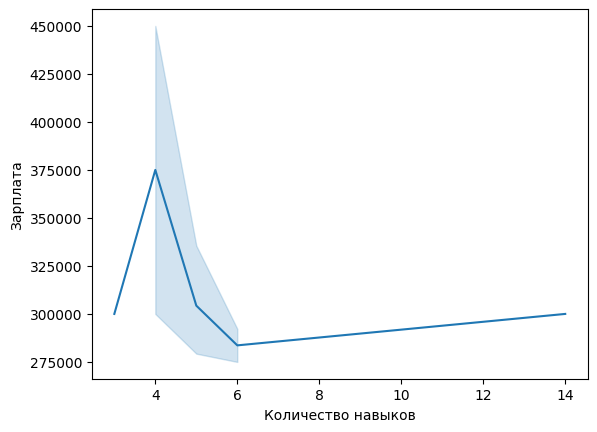

In [57]:
# чуть-чуть визуализации
import seaborn as sns
sns.lineplot(df, x='Количество навыков', y='Зарплата')

Видно, что зарплата не всегда увеличивается с количеством требуемых навыков.

In [58]:
# текст запроса
# Посмотрим зависимость заработной платы от графика и типа трудоустройства.
query_7_2 = f'''
select distinct
    v.schedule "График", 
    v.employment "Трудоустройство",
    round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to))) "Зарплата"
from
    vacancies v
where 
(v.name ilike '%data scientist%' 
or v.name ilike '%data science%'
or v.name ilike '%исследователь данных%' 
or (v.name like '%ML%' and lower(v.name) not like '%html%')
or v.name ilike '%machine learning%' 
or v.name ilike '%машинн%обучен%')
and (v.salary_from is not null or v.salary_to is not null)
group by v.schedule, v.employment
order by 3 desc
limit 10
'''

In [59]:
# результат запроса
df = pd.read_sql_query(query_7_2, connection)
df

,График,Трудоустройство,Зарплата
0,Удаленная работа,Полная занятость,209409.0
1,Полный день,Полная занятость,178307.0
2,Гибкий график,Полная занятость,175000.0
3,Удаленная работа,Частичная занятость,119000.0
4,Удаленная работа,Проектная работа,90000.0
5,Полный день,Частичная занятость,72500.0
6,Гибкий график,Стажировка,37000.0


Видно, что полная занятость оплачивается выше, что логично. Однако, среди специалистов DS удаленная работа оплачивается выше, чем полный день.

In [60]:
# текст запроса
# Посмотрим 10 работодателей, предлагающих самую высокую зарплату в области DS.
query_7_3 = f'''
select distinct
    e.name "Работодатель", 
    round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to))) "Зарплата"
from
    vacancies v
join employers e on e.id = v.employer_id
where 
(v.name ilike '%data scientist%' 
or v.name ilike '%data science%'
or v.name ilike '%исследователь данных%' 
or (v.name like '%ML%' and lower(v.name) not like '%html%')
or v.name ilike '%machine learning%' 
or v.name ilike '%машинн%обучен%')
and (v.salary_from is not null or v.salary_to is not null)
group by e.name
order by 2 desc
limit 10
'''


In [61]:
# результат запроса
df = pd.read_sql_query(query_7_3, connection)
df

,Работодатель,Зарплата
0,Итон,450000.0
1,AppQuantum,350000.0
2,JSA Group,300000.0
3,OVISION,300000.0
4,Semrush,300000.0
5,Дром,300000.0
6,СберЛизинг,300000.0
7,Dbrain,275000.0
8,КИБЕР-РОМ,275000.0
9,Кловер Групп,275000.0


In [62]:
# текст запроса
# Посмотрим 10 самых высокооплачиваемых регионов в области DS.
query_7_4 = f'''
select distinct
    a.name "Регион", 
    round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to))) "Зарплата"
from
    vacancies v
join areas a on a.id = v.area_id
where 
(v.name ilike '%data scientist%' 
or v.name ilike '%data science%'
or v.name ilike '%исследователь данных%' 
or (v.name like '%ML%' and lower(v.name) not like '%html%')
or v.name ilike '%machine learning%' 
or v.name ilike '%машинн%обучен%')
and (v.salary_from is not null or v.salary_to is not null)
group by a.name
order by 2 desc
limit 10
'''

In [63]:
# результат запроса
df = pd.read_sql_query(query_7_4, connection)
df

,Регион,Зарплата
0,Кипр,300000.0
1,Армения,268863.0
2,Сербия,233794.0
3,Турция,233794.0
4,Черногория,233794.0
5,Москва,207630.0
6,Белгород,200000.0
7,Санкт-Петербург,173335.0
8,Новосибирск,166333.0
9,Рязань,136667.0


Общий вывод

Проанализировав почти 50 тыс. вакансий с сайта HeadHunter, можно сказать, что на сайте представлено множество вакансий от крупных компаний, таких как Яндекс, СБЕР, Тинькофф и др. Вакансии представлены не только в РФ, но и в странах СНГ. Исследуемая база содержит вакансии, подразумевающие различные типы графика и трудоустройства, а также вакансии IT сферы. Более подробно исследовав область Data Science, можно сказать, что это направление является перспективным, специалисты достаточно востребованы. Это связано с высоким порогом входа в специальность, даже для начала карьеры требуется множество навыков. Однако и зарплаты специалистов этой области являются привлекательными и быстро растут с опытом работы в данной сфере.